불균형 데이터
- 과적합 / 분포 작은 클래스 재현율이 낮아짐 / 새로운 테스트 데이터에서 예측 성능 낮아짐

under sampling (down sampling) : 데이터 분포가 높은 값을 낮은 값으로 맞춰줌
- 유의미한 데이터만 남길 수 있음 / 정보가 유실 됨
- Random Under Sampling, Tomek link(다른 클래스끼리 가장 가까운 데이터가 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거)
 CNN(Condensed Nearest Neighbour), Edited Nearest Neighbours

over sampling (up sampling) 분포가 작은 클래스 값을 분포가 큰 클래스로 맞춰줌
- 정보의 손실을 막을 수 있음 / over fitting 될 수 있음
- Random Over Sampling, ADASYN(Adaptive Synthetic Sampling - 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성) 
 SMOTE(분류 모형에 따라서 다르게 분류), Combine Sampling

data argumentation (주로 이미지 분석에서 사용)



In [77]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('dataset/train.csv')

train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


In [87]:
# 문자열 형태로 바꾸기
word_to_num = {"white":0, "red":1}

train['type'] = train['type'].replace(word_to_num)
train = train.drop('type',axis=1)


In [ ]:
#변수 이름 할당하기 
data = ["first", "second", "third"]
for name in data:
    globals()[name] = [x for x in range(3)]

# first = [0, 1, 2]
# second = [0, 1, 2]
# third = [0, 1, 2]

for i in range(10):
    globals()['variable{}'.format(i)] = [x for x in range(3)]

# variable0 = [0, 1, 2]
# variable1 = [0, 1, 2]
#  .... 
# variable9 = [0, 1, 2]



In [89]:
#클래스 별로 나눠서 이상치 제거
lst = []
for i in range(4,9):
    globals()['qu{}'.format(i)] = train[train.quality == i]
    lst.append(globals()['qu{}'.format(i)])
    
# 이상치 제거 함수수
def remove_outlier(input_data): 
    q1 = input_data.quantile(0.25) # 제 1사분위수 
    q3 = input_data.quantile(0.75) # 제 3사분위수 
    iqr = q3 - q1 # IQR(Interquartile range) 계산 
    minimum = q1 - (iqr * 1.5) # IQR 최솟값 
    maximum = q3 + (iqr * 1.5) # IQR 최댓값 
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치) 
    df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)] 
    
    return df_removed_outlier

lst2 = []
for i in range(4,9):
    globals()['qu{}_prep'.format(i)] = remove_outlier(lst[i-4])
    lst2.append(globals()['qu{}_prep'.format(i)])
    # 이상치 제거되면서 quality도 nan값으로 변함
    lst2[i-4].quality = i
    lst2[i-4].dropna(axis = 0, how = 'any', inplace = True)
    print("이상치 포함된 데이터 비율: ", round( (len(train[train.quality == i]) - len(lst2[i-4])) / len(train[train.quality == i]),2)) 
# lst[3]
lst2[3] 
    

이상치 포함된 데이터 비율:  0.16
이상치 포함된 데이터 비율:  0.18
이상치 포함된 데이터 비율:  0.22
이상치 포함된 데이터 비율:  0.25
이상치 포함된 데이터 비율:  0.19


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,7
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
13,14,6.9,0.24,0.49,1.3,0.032,35.0,148.0,0.99320,3.45,0.57,10.7,7
14,15,6.7,0.30,0.29,2.8,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,7
20,21,7.4,0.16,0.33,1.2,0.042,47.0,121.0,0.99198,3.04,0.68,10.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,3218,7.4,0.25,0.37,6.9,0.020,14.0,93.0,0.99390,3.00,0.48,10.7,7
3218,3219,6.9,0.18,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.5,7
3220,3221,6.4,0.18,0.31,1.6,0.049,36.0,127.0,0.99340,3.60,0.67,10.4,7
3224,3225,8.1,0.20,0.49,11.8,0.048,46.0,212.0,0.99680,3.09,0.46,10.0,7


In [91]:
train = pd.concat(lst2,axis=0)
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
21,22,6.5,0.52,0.17,1.4,0.047,5.0,26.0,0.99320,3.26,0.32,10.0,4
44,45,7.6,0.33,0.36,2.1,0.034,26.0,172.0,0.99440,3.42,0.48,10.5,4
194,195,8.6,0.34,0.36,1.4,0.045,11.0,119.0,0.99556,3.17,0.47,9.4,4
205,206,7.6,0.48,0.37,0.8,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,4
625,626,8.5,0.17,0.49,8.8,0.048,23.0,108.0,0.99470,2.88,0.34,10.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,3013,5.6,0.12,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8
3044,3045,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2,8
3143,3144,6.1,0.28,0.27,4.7,0.030,56.0,140.0,0.99042,3.16,0.42,12.5,8
3155,3156,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8


In [92]:
# 분석에 필요 없는 id 와 예측하고자 하는 값 quality를 제거해줍니다.
X = train.drop(['id', 'quality'], axis=1)
y = train['quality']

In [98]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 모델 선언
model = LogisticRegression(solver='liblinear')
model2 = SVC()

# 모델 학습
model.fit(X, y)
model2.fit(X, y)

prediction = model.predict(X)
prediction2 = model2.predict(X)
score = ACCURACY(y, prediction)
score2 = ACCURACY(y, prediction2)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")
print(f"모델의 정확도는 {score2*100:.2f}% 입니다")

모델의 정확도는 57.65% 입니다
모델의 정확도는 46.47% 입니다


In [106]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
smote = SMOTE(random_state=42)
# adasyn = ADASYN()
border = BorderlineSMOTE()
X_train_over,y_train_over = smote.fit_resample(X,y)
# X_, y_ = adasyn.fit_resample(X,y)
X__, y__ = border.fit_resample(X,y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

# https://john-analyst.medium.com/smote%EB%A1%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%88%EA%B7%A0%ED%98%95-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0-5ab674ef0b32

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2550, 11) (2550,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (5495, 11) (5495,)
SMOTE 적용 후 레이블 값 분포: 
 4    1099
8    1099
5    1099
6    1099
7    1099
Name: quality, dtype: int64


In [93]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X_train_over,y_train_over)

LogisticRegression(solver='liblinear')

In [8]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [113]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(X_train_over)
score = ACCURACY(y_train_over, prediction)
print(f"모델의 정확도는 {score*100:.2f}% 입니다")

# prediction = model.predict(X_)
# score = ACCURACY(y_, prediction)
# print(f"모델의 정확도는 {score*100:.2f}% 입니다")

prediction = model.predict(X__)
score = ACCURACY(y__, prediction)
print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 31.41% 입니다
모델의 정확도는 31.06% 입니다


In [94]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(X_train_over)
score = ACCURACY(y_train_over, prediction)
print(f"모델의 정확도는 {score*100:.2f}% 입니다")

prediction = model.predict(X_)
score = ACCURACY(y_, prediction)
print(f"모델의 정확도는 {score*100:.2f}% 입니다")

prediction = model.predict(X__)
score = ACCURACY(y__, prediction)
print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 46.83% 입니다
모델의 정확도는 47.66% 입니다
모델의 정확도는 48.17% 입니다


In [10]:
# 어떤 부분에서 취약한지 확인
from collections import Counter

pred_cnt = Counter(prediction)
true_cnt = Counter(y_train_over)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {pred_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개")

4 값 예측 개수: 1712개, 실제 값 개수: 1418개
5 값 예측 개수: 1616개, 실제 값 개수: 1418개
6 값 예측 개수: 765개, 실제 값 개수: 1418개
7 값 예측 개수: 1100개, 실제 값 개수: 1418개
8 값 예측 개수: 1897개, 실제 값 개수: 1418개


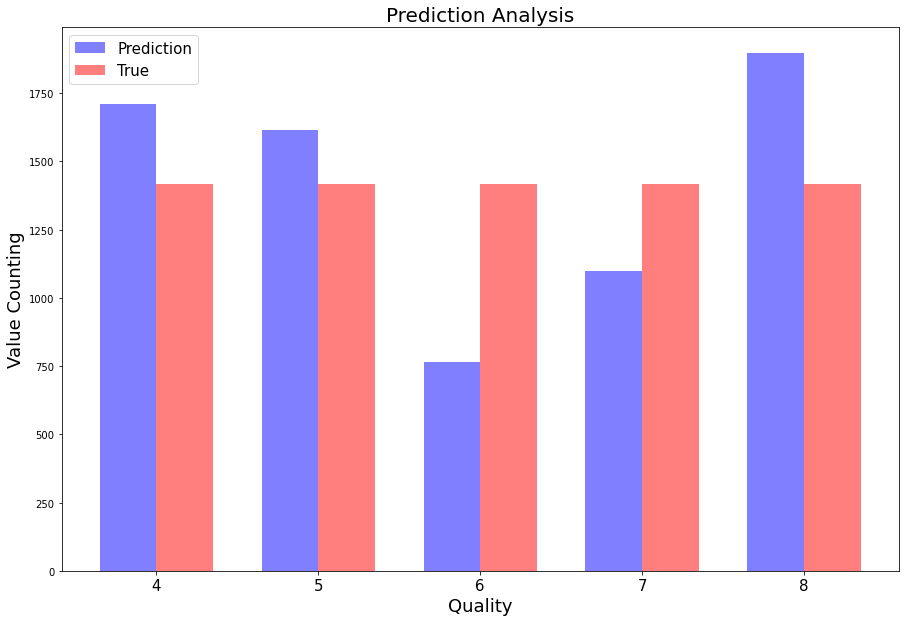

In [11]:
import matplotlib.pyplot as plt

index = sorted(true_cnt.keys())
pred_val = [pred_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], pred_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

5를 보니 예측값과 실제값의 개수가 비슷하지만, 5에 대해서 제대로 예측했다고 볼 수 없음음
이 분석에서 알 수 있는 것은 '이 모델이 6을 매우 좋아하고 4와 8을 아주 싫어한다는 것'뿐

In [13]:
accurate = y_train_over[y_train_over==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y_train_over)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  3246
4 값 예측 개수: 1011개, 실제 값 개수: 1418개, 정답률: 71.30%
5 값 예측 개수: 733개, 실제 값 개수: 1418개, 정답률: 51.69%
6 값 예측 개수: 258개, 실제 값 개수: 1418개, 정답률: 18.19%
7 값 예측 개수: 414개, 실제 값 개수: 1418개, 정답률: 29.20%
8 값 예측 개수: 830개, 실제 값 개수: 1418개, 정답률: 58.53%


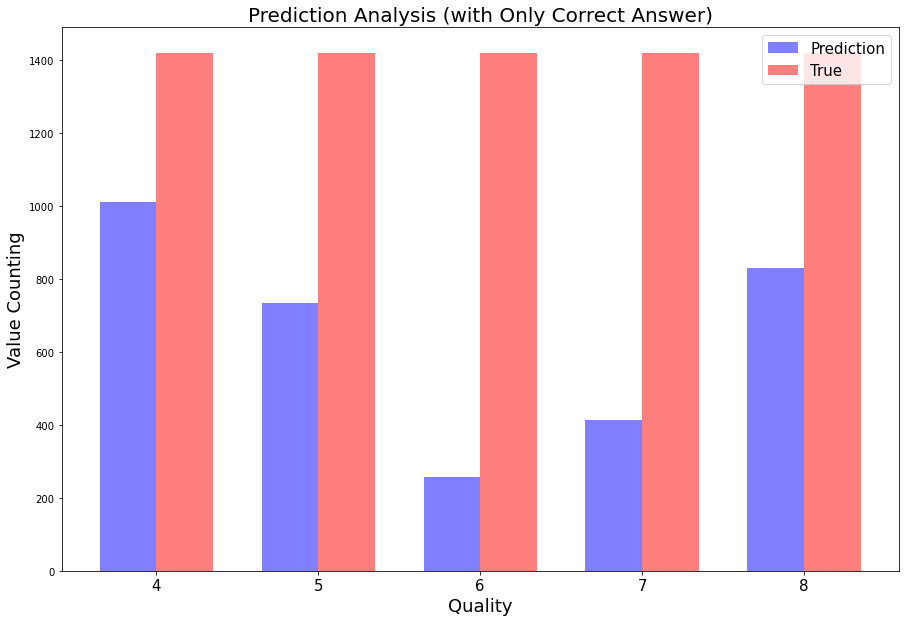

In [16]:
#정답률 
index = sorted(true_cnt.keys())
accu_val = [accu_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], accu_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis (with Only Correct Answer)', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

In [12]:
test = pd.read_csv('dataset/test.csv')
word_to_num = {"white":0, "red":1}

test['type'] = test['type'].replace(word_to_num)

prediction = model.predict(test.drop('id', axis=1))
prediction

array([6, 5, 5, ..., 5, 6, 6], dtype=int64)

In [13]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['quality'] = prediction
submission

,id,quality
0,1,6
1,2,5
2,3,5
3,4,6
4,5,5
...,...,...
3226,3227,5
3227,3228,6
3228,3229,5
3229,3230,6


In [14]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)